In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,ShuffleSplit,learning_curve,cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score,precision_recall_curve
from sklearn.metrics import confusion_matrix
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from mpl_toolkits.mplot3d import Axes3D



In [ ]:
def model(classifier_name, X, y):
    print(classifier_name)
    print('data shape:{0}'.format(X.shape))
#     classifier = RandomForestClassifier(n_jobs=8,class_weight = {0: 1000, 1: 1})
    classifier = RandomForestClassifier(n_jobs=10)
#     classifier = xgb.XGBClassifier(objective='binary:logistic', n_jobs=10)
    # classifier = xgb.XGBClassifier(objective='binary:logistic', n_jobs=8,scale_pos_weight=0.1)
#     classifier = tree.DecisionTreeClassifier()
    classifier.fit(X=X, y=y)
    # jl.dump(classifier,'{0}.joblib'.format(classifier_name))
    return classifier

def evaluate_performance(prefix, classifier, X, y):
    """
    :param classifier: Trained classifier
    :param X: array-like of shape (n_samples,n_features)
    :param y:array-like of shape (n_samples)
    :return: None
    """
    print(prefix)
    y_predict = classifier.predict(X)
    print('y_val counter:{0}'.format(Counter(y)))
    print('y_predict counter:{0}'.format(Counter(y_predict)))
    y_predict_proba = classifier.predict_proba(X)

    pos_count = len(y_predict[y_predict==1])
    tp = 0
    for i in range(len(y_predict)):
        if y.iloc[i]==1 and y.iloc[i]== y_predict[i]:
            tp = tp+1
    print('pos_count',pos_count,tp)

    target_names = ['class 0', 'class 1']
    precision = metrics.precision_score(y, y_pred=y_predict, average='macro')
    recall = metrics.recall_score(y,y_predict)
    print(classification_report(y_true=y, y_pred=y_predict))
    print('roc_auc_score:{0}'.format(metrics.roc_auc_score(y_true=y,y_score=y_predict)))
    metrics.plot_roc_curve(estimator=classifier, X=X, y=y)
    metrics.plot_confusion_matrix(classifier, X, y)
    print('precision:{0}'.format(precision))
    print('recall:{0}'.format(recall))
    print(metrics.confusion_matrix(y,y_predict))

    
    
def _plot(X, y, labels, title):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], marker='o', c=y)
    ax.set_xlabel('X label')
    ax.set_ylabel('Y label')
    ax.set_zlabel('Z label')
    ax.set_title(title)
    plt.show()
    
def mynormalize(data):
    """
    Rescaling data to have values between 0 and 1
    :param data:numpy array ,shape:(n_samples,n_features)
    :return:
    """
    data = (data - np.min(data)) / (np.max(data) - np.min(data))
    return data

In [ ]:
df = pd.read_csv('creditcard.csv',sep=',')

In [ ]:
print(df.shape)
c = Counter(df['Class'])
c[1]/c[0]

In [ ]:
fig = plt.figure(figsize=(8,5))
sns.countplot(df['Class'])

In [ ]:
columns = df.columns.to_list()
print(columns)
X,y = df[columns[1:-1]],df[columns[-1]]
print(X.shape,y.shape)

In [ ]:
pca = PCA(n_components=3)
X_re = pca.fit_transform(X)
_plot(X_re,y,'pca',title='pca')

# train val test split 

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 42)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.25,random_state=42)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)
print(X_val.shape)
print(X_train.shape[0]/X.shape[0],X_val.shape[0]/X.shape[0],X_test.shape[0]/X.shape[0])

In [ ]:
confusion_matrix??

# BaseLine

In [ ]:
classifier = model('RandomForest',X_train,y_train)
evaluate_performance('val dataset',classifier,X_val,y_val)

# balance dataset
## Under Sample

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 42)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.25,random_state=42)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)
print(X_val.shape)
print(X_train.shape[0]/X.shape[0],X_val.shape[0]/X.shape[0],X_test.shape[0]/X.shape[0])
ros = RandomUnderSampler(random_state=42)
X_train,y_train = ros.fit_resample(X=X_train,y=y_train)
print('Original :{0}'.format(Counter(y_train)))
print('Undersample :{0}'.format(Counter(y_train)))

In [ ]:
classifier = model('RandomForest',X_train,y_train)
evaluate_performance('val dataset',classifier,X_val,y_val)

## Over Sample

In [ ]:
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 42)
# X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.25,random_state=42)
# print(X_train.shape,y_train.shape)
# print(X_test.shape,y_test.shape)
# print(X_val.shape)
# print(X_train.shape[0]/X.shape[0],X_val.shape[0]/X.shape[0],X_test.shape[0]/X.shape[0])
ros = RandomOverSampler(random_state=42)
X_train,y_train = ros.fit_resample(X=X_train,y=y_train)
print('Original :{0}'.format(Counter(y_train)))
print('Undersample :{0}'.format(Counter(y_train)))

In [ ]:
classifier = model('RandomForest',X_train,y_train)

In [ ]:
evaluate_performance('val dataset',classifier,X_val,y_val)

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA,TruncatedSVD
import matplotlib.patches as mpatches
import time

#Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

#Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler,RobustScaler
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,accuracy_score,classification_report
from imblearn.metrics import classification_report_imbalanced
from sklearn.model_selection import KFold,StratifiedKFold
from collections import Counter
import warnings
warnings.filterwarnings('ignore')


/home/xiejh/miniconda2/envs/dj/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/xiejh/miniconda2/envs/dj/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/xiejh/miniconda2/envs/dj/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/xiejh/miniconda2/envs/dj/lib/python3.6/site-packages

In [2]:
df = pd.read_csv('creditcard.csv',sep=',')

In [3]:
print(df.shape)
df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
print('No Frauds {0} of the dataset'.format(df[df['Class']==0].shape[0]/df.shape[0]))
print('Frauds {0} of dataset'.format(df[df['Class']==1].shape[0]/df.shape[0]))

No Frauds 0.9982725143693799 of the dataset
Frauds 0.001727485630620034 of dataset


# Scaling 

In [5]:
# Since most of our data has already bean scaled 
# We should scale the columns that are left to scale (Amount and Time)
std_scaler = StandardScaler()
rob_scaler = RobustScaler()
df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))
df.drop(['Time','Amount'],axis=1,inplace=True)
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']
df.drop(['scaled_amount','scaled_time'],axis=1,inplace=True)
df.insert(0,'scaled_amount',scaled_amount)
df.insert(1,'scaled_time',scaled_time)

In [6]:
df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


# Splitting the Data (Original DataFrame)

In [7]:
X = df.drop('Class',axis=1)
y = df['Class']
sss = StratifiedShuffleSplit(n_splits=5,random_state=42)
for train_index,test_index in sss.split(X,y):
    print('Train:',train_index.shape,"Test:",test_index.shape)
    original_Xtrain,original_Xtest = X.iloc[train_index],X.iloc[test_index]
    original_ytrain,original_ytest = y.iloc[train_index],y.iloc[test_index]
    
original_Xtrain = original_Xtrain.values
original_ytrain = original_ytrain.values
original_Xtest = original_Xtest.values
original_ytest = original_ytest.values

Train: (256326,) Test: (28481,)
Train: (256326,) Test: (28481,)
Train: (256326,) Test: (28481,)
Train: (256326,) Test: (28481,)
Train: (256326,) Test: (28481,)


In [8]:
train_unique_label,train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label,test_counts_label = np.unique(original_ytest,return_counts=True)
print('Label Distribution\n')
print(train_counts_label/len(original_Xtrain))
print(test_counts_label/len(original_Xtest))

Label Distribution

[0.99827173 0.00172827]
[0.99827955 0.00172045]


# Random UnderSample

In [9]:
print(df.shape)
df = df.sample(frac=1)
fraud_df = df.loc[df['Class']==1]
non_fraud_df = df.loc[df['Class']==0][:492]
print('fraud shape:',fraud_df.shape)
print('non fraud shape:',non_fraud_df.shape)
normal_distributed_df = pd.concat([fraud_df,non_fraud_df])
#shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1,random_state=42)
new_df.head()

(284807, 31)
fraud shape: (492, 31)
non fraud shape: (492, 31)


,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
136341,0.265493,-0.035656,-1.395349,1.175868,0.927222,-0.058884,0.260726,-0.468991,0.636697,0.294333,...,-0.287858,0.202607,0.359608,-0.434851,0.038313,0.316410,-0.494432,-0.234622,-0.053330,0
181966,0.251520,0.475898,-0.769172,1.342212,-2.171454,-0.151513,-0.648374,-0.973504,-1.706658,0.313745,...,-0.102294,-0.036122,-0.753591,-0.047113,0.358493,-0.287407,0.476506,0.250531,0.250987,1
48906,1.075945,-0.480034,-0.507570,0.941750,1.227483,0.857375,0.006491,-0.607928,1.305684,-0.450175,...,0.203230,0.065697,0.526560,-0.149446,0.411070,-0.214152,-0.356726,0.170602,-0.020062,0
6820,-0.293440,-0.893784,-2.169929,3.639654,-4.508498,2.730668,-2.122693,-2.341017,-4.235253,1.703538,...,0.500779,0.645103,-0.503529,-0.000523,0.071696,0.092007,0.308498,0.552591,0.298954,1
15566,1.089779,-0.678239,-23.237920,13.487386,-25.188773,6.261733,-17.345188,-4.534989,-17.100492,15.374630,...,1.630787,1.769708,-1.691973,-1.045673,0.143386,1.611577,-0.221576,1.481233,0.438125,1


Distribution of the Classes in the subsample dataset
1    0.001727
0    0.001727
Name: Class, dtype: float64


Text(0.5, 1.0, 'Equally Distributed Classes')

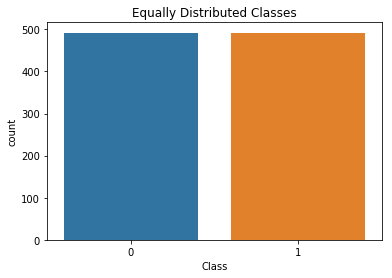

In [10]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(df))
sns.countplot('Class',data = new_df)
plt.title('Equally Distributed Classes')

# Correlation Matrics

Text(0.5, 1.0, 'SubSample Correlation Matrix \n (use for reference)')

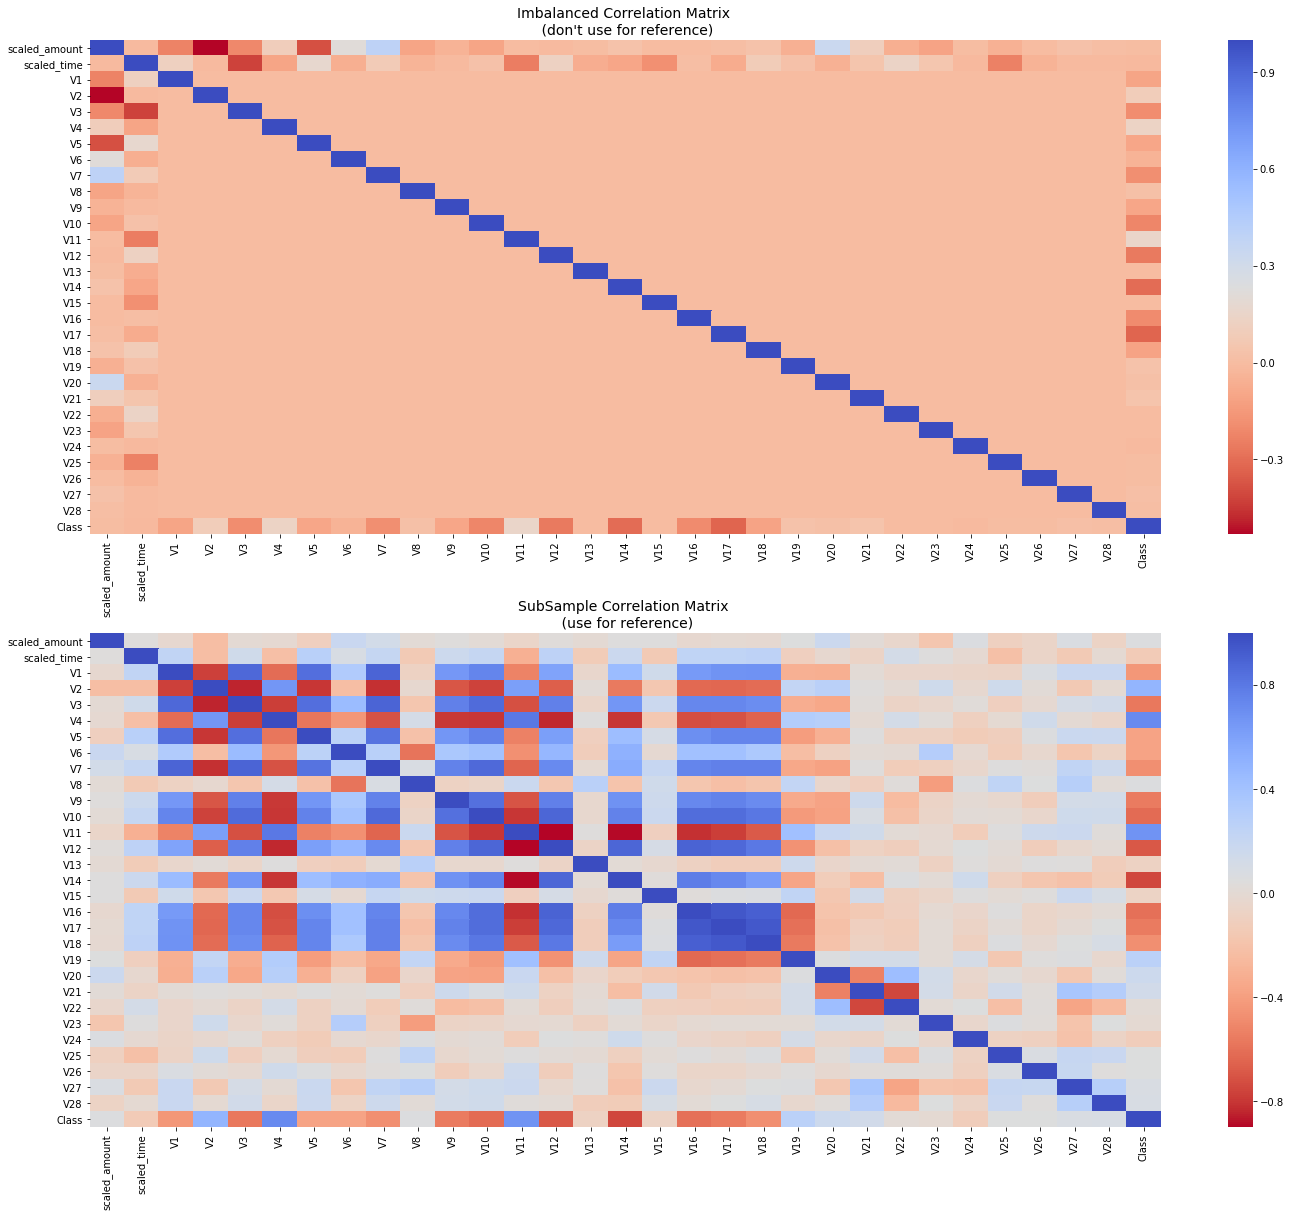

In [11]:
f,(ax1,ax2) = plt.subplots(2,1,figsize=(24,20))
corr = df.corr()
sns.heatmap(corr,cmap='coolwarm_r',annot_kws={'size':20},ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)",fontsize=14)


sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr,cmap='coolwarm_r',annot_kws={'size':20},ax=ax2)
ax2.set_title("SubSample Correlation Matrix \n (use for reference)",fontsize=14)

Text(0.5, 1.0, 'V10 vs Class Negative Correlation')

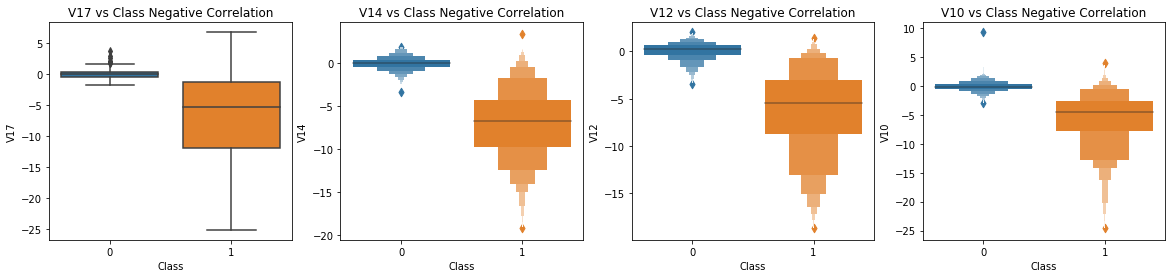

In [12]:
f,axes = plt.subplots(ncols=4,figsize=(20,4))
#Negative Correlations with out Class (The lower our feature value the more likely it will be a fraud transcaction)
#在负相关性的特征里，值越低越越有可能是欺诈交易
sns.boxplot(x='Class',y='V17',data=new_df,ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxenplot(x='Class',y='V14',data=new_df,ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')

sns.boxenplot(x="Class",y='V12',data=new_df,ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')

sns.boxenplot(x="Class",y='V10',data=new_df,ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

Text(0.5, 1.0, 'V19 vs Class Positive Correlation')

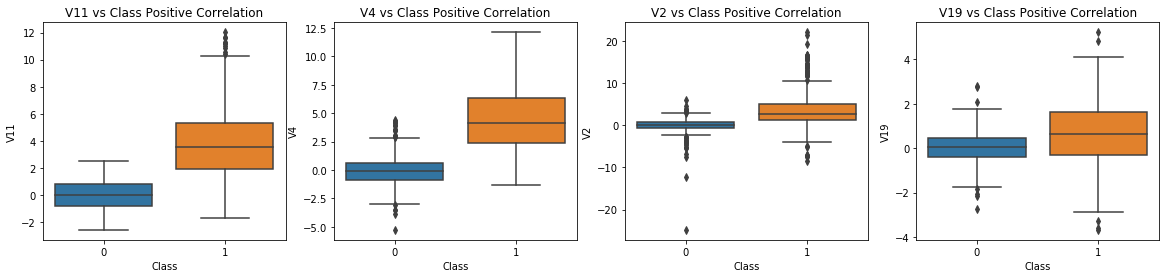

In [13]:
f,axes = plt.subplots(ncols=4,figsize=(20,4))
#Positive correlations(The higher the feature the probability increase that it will be fraud transcaction)
#在正相关性的特征里，值越高越有可能是欺诈交易
sns.boxplot(x="Class",y="V11",data=new_df,ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class",y="V4",data=new_df,ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')

sns.boxplot(x="Class",y="V2",data=new_df,ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')

sns.boxplot(x="Class",y="V19",data=new_df,ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

# Anormaly Detection
### Our main aim in this section is to remove "extreme outlier" from features that have a high correlation with our classes.This will have a positive impact on the accuracy of our models


# Interquartile Range Method
- Interquartile Range(IQR):we calculate this by the difference between the 75th percentile and 25th percentile. Our aim is to create a threshold beyond the 75th and 25th percentile that in case some instance pass this threshold the instance will be deleted.
- Boxplotx:Besides easily seeing the 25th and 75th percentiles(both end of the squares) it is also easy to see extreme outliers(points beyond the lower and higher extreme)

### Outlier Removal Tradeoff
We have to be careful as to how far do we want the threshold for removing outliers.We determine the threshold by multiplying a number(ex:1.5) by the (Interquartile Range).The higher this threshold is the less outliers will detect (multiplying by a higher number ex:3),and the lower this threshold is the more outliers it will detect
### The Tradeoff
The lower the threshold the more outliers it will remove however,we want to focus on "extreme outliers' rather than just outliers.Why?Because we might run the risk of information loss which will cause our models to have lower accuracy.You can play with this threshold and see how it affects the accuracy of our classification models

### Summary
- Visualize Distributions:We first start by visualizing the distribution of the feature we are going to use to eliminate some of the outliers.V14 is the only feature that has a Gaussian distribution compared to features V12 and V10
- Determining the threshold: After we decide which nubmer we will use to multiply with the IQR(the lower more outliers removed),we will proceed in determining the upper and lower thresholds by substrating q25-threshold(lower extreme threshold) and adding q75+ threshold (upper extreme threshold)
- Conditional Dropping:Lastly,we create a conditioin dropping stating that if the "threshold" is exceeded in both extremes,the instances will be removed.
- Boxplot Representation:Visualize through the boxplot that the number of "extreme outliers" have been reduced to a considerable amount.

References:More information on Interquartile Range Method:How to Use Statistics to idendify Outliers in Data by Jason Brownless(Machine Learning Mastery blog)

Text(0.5, 1.0, 'V10 Distribution \n(Fraud Transactions)')

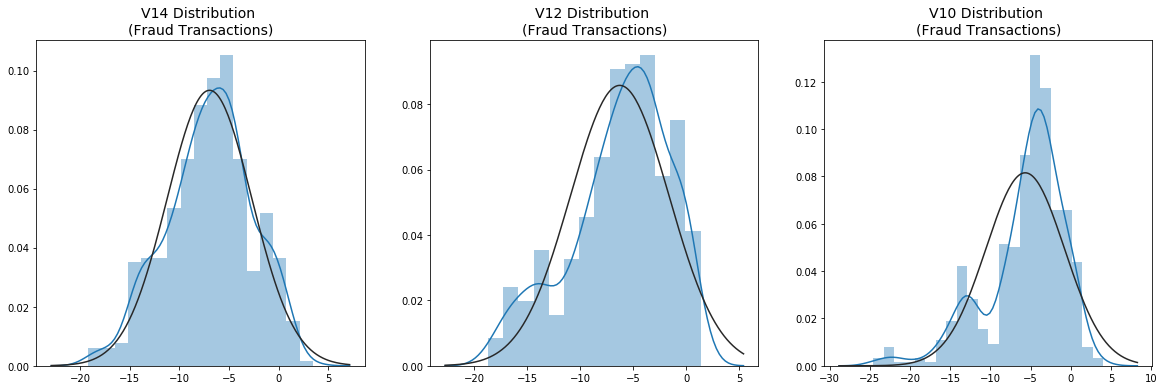

In [16]:
f,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,6))
v14_fraud_dist = new_df['V14'].loc[new_df['Class']==1].values
sns.distplot(v14_fraud_dist,ax=ax1,fit=norm)
ax1.set_title('V14 Distribution \n(Fraud Transactions)',fontsize=14)

v12_fraud_dist = new_df['V12'].loc[new_df['Class']==1].values
sns.distplot(v12_fraud_dist,ax=ax2,fit=norm)
ax2.set_title('V12 Distribution \n(Fraud Transactions)',fontsize=14)

v10_fraud_dist = new_df['V10'].loc[new_df['Class']==1].values
sns.distplot(v10_fraud_dist,ax=ax3,fit=norm)
ax3.set_title('V10 Distribution \n(Fraud Transactions)',fontsize=14)

In [18]:
# # -----> V14 Removing Outliers (Highest Negative Correlated with Labels)
v14_fraud = new_df['V14'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v14_iqr = q75 - q25
print('iqr: {}'.format(v14_iqr))

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V14 outliers:{}'.format(outliers))

new_df = new_df.drop(new_df[(new_df['V14'] > v14_upper) | (new_df['V14'] < v14_lower)].index)
print('----' * 44)


# -----> V12 removing outliers from fraud transactions
v12_fraud = new_df['V12'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('V12 outliers: {}'.format(outliers))
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V12'] > v12_upper) | (new_df['V12'] < v12_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))
print('----' * 44)

# Removing outliers V10 Feature
v10_fraud = new_df['V10'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 outliers: {}'.format(outliers))
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V10'] > v10_upper) | (new_df['V10'] < v10_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))

Quartile 25: -9.40542306160986 | Quartile 75: -4.28925378244217
iqr: 5.116169279167689
Cut Off: 7.674253918751534
V14 Lower: -17.07967698036139
V14 Upper: 3.3850001363093636
Feature V14 Outliers for Fraud Cases: 5
V14 outliers:[3.4424219959421496, -17.6206343516773, -17.7216383537133, -17.4759212828566, -17.230202160711]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V12 Lower: -15.428201645916527
V12 Upper: 4.81480448146737
V12 outliers: [-15.479052483201599, -17.003289445516, -15.969207520809, -17.1829184301947, -15.5316111795156, -15.717606646877199, -17.003289445516, -15.835718807734402, -16.218610393127, -17.1504052507291, -17.1829184301947, -15.5316111795156]
Feature V12 Outliers for Fraud Cases: 12
Number of Instances after outliers removal: 931
-----------------------------------------------------------------------------------------------------------

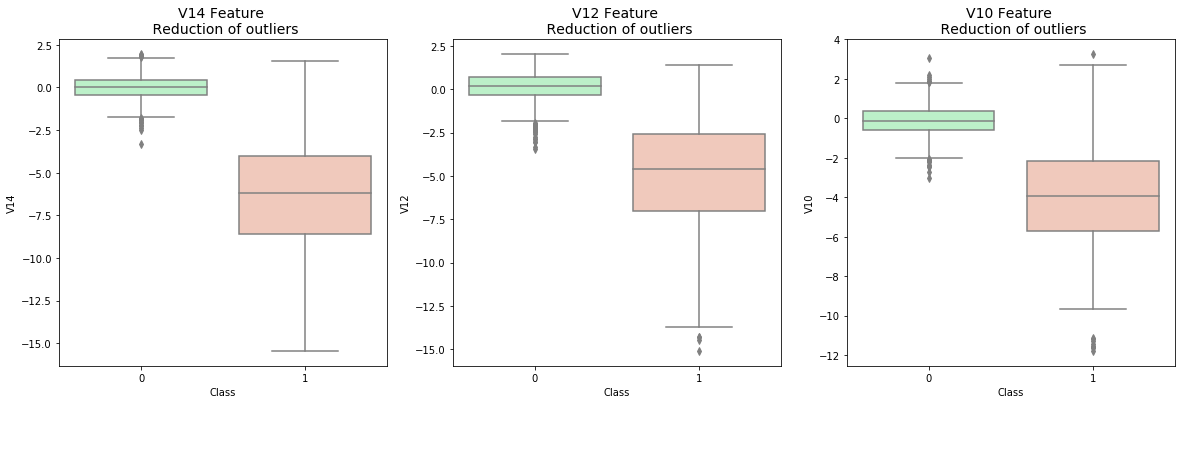

In [19]:
f,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,6))

colors = ['#B3F9C5', '#f9c5b3']
# Boxplots with outliers removed
# Feature V14
sns.boxplot(x="Class", y="V14", data=new_df,ax=ax1, palette=colors)
ax1.set_title("V14 Feature \n Reduction of outliers", fontsize=14)
ax1.annotate('Fewer extreme \n outliers', xy=(0.98, -17.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature 12
sns.boxplot(x="Class", y="V12", data=new_df, ax=ax2, palette=colors)
ax2.set_title("V12 Feature \n Reduction of outliers", fontsize=14)
ax2.annotate('Fewer extreme \n outliers', xy=(0.98, -17.3), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature V10
sns.boxplot(x="Class", y="V10", data=new_df, ax=ax3, palette=colors)
ax3.set_title("V10 Feature \n Reduction of outliers", fontsize=14)
ax3.annotate('Fewer extreme \n outliers', xy=(0.95, -16.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

plt.show()

# Dimensionality Reduction and Clustering

## Understanding t-SNE
In order to understand this algorithm you have to understand the following terms:
- Euclidean Distance
- Conditional Probability
- Normal and T-Distribution Plots

Reference:
     https://www.youtube.com/watch?v=NEaUSP4YerM

In [20]:
X = new_df.drop('Class',axis=1)
y = new_df['Class']

# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2,random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

#PCA Implementation
t0 = time.time()
X_reducted_pca = PCA(n_components=2,random_state=42).fit_transform(X.values)
t1 = time.time()
print('PCA took:{:.2} s'.format(t1 - t0))

#TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2,algorithm='randomized',random_state=42).fit_transform(X.values)
t1 = time.time()
print('Truncated SVD took {:.2} s'.format(t1 - t0))

T-SNE took 2.2 s
PCA took:0.0062 s
Truncated SVD took 0.016 s


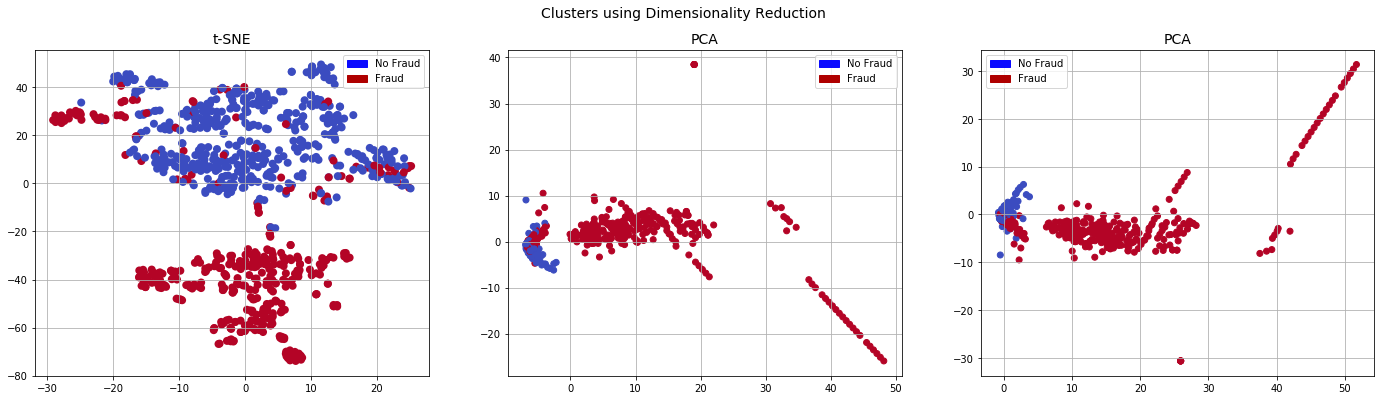

In [21]:
f,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(24,6))
f.suptitle('Clusters using Dimensionality Reduction',fontsize=14)
blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=y, cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)
ax1.grid(True)
ax1.legend(handles=[blue_patch,red_patch])

ax2.scatter(X_reducted_pca[:,0],X_reducted_pca[:,1],c=y,cmap='coolwarm')
ax2.set_title('PCA',fontsize=14)
ax2.grid(True)
ax2.legend(handles=[blue_patch,red_patch])

ax3.scatter(X_reduced_svd[:,0],X_reduced_svd[:,1],c=y,cmap='coolwarm')
ax3.set_title('PCA',fontsize=14)
ax3.grid(True)
ax3.legend(handles=[blue_patch,red_patch])

# Classifiers(UnderSampling)
In this section we will train four types of classifiers and decide which classifier will be more effective in detecting fraud transctions.
Before we have to split out data into trainning and testing sets and separate the features from labels

In [23]:
# Undersampling before cross validating 
X = new_df.drop('Class',axis=1)
y = new_df['Class']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [24]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [25]:
for key,classifier in classifiers.items():
    classifier.fit(X_train,y_train)
    training_score = cross_val_score(classifier,X_train,y_train,cv=5)
    print('Classifiers:',classifier.__class__.__name__,"Has a training score of",round(training_score.mean(),2)*100,"% accuracy score")

Classifiers: LogisticRegression Has a training score of 94.0 % accuracy score
Classifiers: KNeighborsClassifier Has a training score of 92.0 % accuracy score
Classifiers: SVC Has a training score of 93.0 % accuracy score
Classifiers: DecisionTreeClassifier Has a training score of 90.0 % accuracy score


In [31]:
log_reg_params = {"penalty":['l1','l2'],'C':[0.001,0.01,0.1,1,10,100,1000]}
grid_log_reg = GridSearchCV(LogisticRegression(),log_reg_params)
grid_log_reg.fit(X_train,y_train)
#We automatically get the logistic regression with the best parameters
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_

In [32]:
#Overfitting Case
log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  94.32%
Knears Neighbors Cross Validation Score 92.94%
Support Vector Classifier Cross Validation Score 94.46%
DecisionTree Classifier Cross Validation Score 92.11%


In [ ]:
#We will undersample during cross validating
undersample_X = df.drop('Class',axis=1)
undersample_y = df['Class']
for train_index,test_index in sss.split(undersample_X,undersample_y):
    print("Train:",train_index.shape,'Test:',test_index.shape)
    undersample_Xtrain,undersample_Xtest = undersample_X.iloc[train_index],undersample_X.iloc[test_index]
    undersample_ytrain,undersample_ytest = undersample_y.iloc[train_index],undersample_y.iloc[test_index]

print('Original Label Distribution:{}'.format(Counter(undersample_y)))
    
undersample_Xtrain = undersample_Xtrain.values
undersample_ytrain = undersample_ytrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytest = undersample_ytest.values
undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

# Implementing NearMiss Technique
# Distribution of NearMiss
#Just to see how it distribution the labels,we won't use these variables
X_nearmiss,y_nearmiss = NearMiss().fit_sample(undersample_Xtrain,undersample_ytrain)
print('NearMiss Label Distribution:{}'.format(Counter(y_nearmiss)))
for train, test in sss.split(undersample_Xtrain, undersample_ytrain):
    undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), log_reg) # SMOTE happens during Cross Validation not before..
    undersample_model = undersample_pipeline.fit(undersample_Xtrain[train], undersample_ytrain[train])
    undersample_prediction = undersample_model.predict(undersample_Xtrain[test])
    undersample_accuracy.append(undersample_pipeline.score(undersample_Xtrain[test],undersample_ytrain[test]))
    undersample_precision.append(precision_score(undersample_ytrain[test], undersample_prediction))
    undersample_recall.append(recall_score(undersample_ytrain[test], undersample_prediction))
    undersample_f1.append(f1_score(undersample_ytrain[test], undersample_prediction))
    undersample_auc.append(roc_auc_score(undersample_ytrain[test], undersample_prediction))

In [ ]:
def plot_learning_curve(estimator1, estimator2, estimator3, estimator4, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,14), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")
    
    # Second Estimator 
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax2.set_title("Knears Neighbors Learning Curve", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")
    
    # Third Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax3.set_title("Support Vector Classifier \n Learning Curve", fontsize=14)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")
    
    # Fourth Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax4.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax4.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax4.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax4.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax4.set_title("Decision Tree Classifier \n Learning Curve", fontsize=14)
    ax4.set_xlabel('Training size (m)')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc="best")
    return plt

In [ ]:
cv = ShuffleSplit(n_splits=100,test_size = 0.2,random_state=42)
plot_learning_curve(log_reg,knears_neighbors,svc,tree_clf,X_train,y_train,(0.87,1.01),cv=cv,n_jobs=4)

In [ ]:
#Create a DataFrame with all the scores and classifiers names.
log_reg_pred = cross_val_predict(log_req,X_train,y_train,cv=5
                                 ,method='decision_function')
knears_pred = cross_val_predict(knears_neighbors,X_train,y_train,cv=5)

svc_pred = cross_val_predict(svc,X_train,y_train,cv=5)
tree_pred = cross_val_predict(tree_clf,X_train,y_train,cv=5)
print('Logistic Regression',roc_auc_score(y_train,log_reg_pred))
print('KNnears Neighbors: ',roc_auc_score(y_train,knears_pred))
print('Support Vector Classifier: ',roc_auc_score(y_train,svc_pred))
print('Decision Tree Classifier; ',roc_auc_score(y_train,tree_pred))

In [ ]:

log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)


def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)
plt.show()

# A Deeper Look into LogisticRegression:
In this section we will ive a deeper look into the logistic regression classifier.

Terms:
- True Positives: Correctly Classified Fraud Transactions
- False Positives: Incorrectly Classified Fraud Transactions
- True Negative: Correctly Classified Non-Fraud Transactions
- False Negative: Incorrectly Classified Non-Fraud Transactions
- Precision: True Positives/(True Positives + False Positives)
- Recall: True Positives/(True Positives + False Negatives)
- Precision as the name says, says how precise (how sure) is our model in detecting fraud transactions while recall is the amount of fraud cases our model is able to detect.
- Precision/Recall Tradeoff: The more precise (selective) our model is, the less cases it will detect. Example: Assuming that our model has a precision of 95%, Let's say there are only 5 fraud cases in which the model is 95% precise or more that these are fraud cases. Then let's say there are 5 more cases that our model considers 90% to be a fraud case, if we lower the precision there are more cases that our model will be able to detect.
#### Summary:
- Precision starts to descend between 0.90 and 0.92 nevertheless, our precision score is still pretty high and still we have a descent recall score.

In [ ]:
def logistic_roc_curve(log_fpr, log_tpr):
    plt.figure(figsize=(12,8))
    plt.title('Logistic Regression ROC Curve', fontsize=16)
    plt.plot(log_fpr, log_tpr, 'b-', linewidth=2)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.axis([-0.01,1,0,1])
    
    
logistic_roc_curve(log_fpr, log_tpr)
plt.show()

In [ ]:
precision, recall, threshold = precision_recall_curve(y_train, log_reg_pred)

In [ ]:
y_pred = log_reg.predict(X_train)

# Overfitting Case
print('---' * 45)
print('train distribution: ',Counter(y_train))
print('Overfitting: \n')
print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred)))
print('confusion matrix: \n',confusion_matrix(y_true=y_train,y_pred=y_pred))
print('---' * 45)

# How it should look like
print('---' * 45)
print('How it should be:\n')
print('undersample Distribution: ',Counter(undersample_ytrain))
print("Accuracy Score: {:.2f}".format(np.mean(undersample_accuracy)))
print("Precision Score: {:.2f}".format(np.mean(undersample_precision)))
print("Recall Score: {:.2f}".format(np.mean(undersample_recall)))
print("F1 Score: {:.2f}".format(np.mean(undersample_f1)))
# print('confusion matrix: \n',confusion_matrix(y_true=undersample_ytrain,y_pred=undersample_y))
print('---' * 45)

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.metrics import average_precision_score

In [ ]:
print('Length of X(train):{} | Length of y(train):{}'.format(len(original_Xtrain),len(original_ytrain)))
print('Length of X(test):{} | Length of y(train):{}'.format(len(original_Xtest),len(original_ytest)))
#List to append the score and then find the average
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

#Classifier with optimal parameters
#log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm = LogisticRegression()
log_reg_params = {"penalty":['l2'],'C':[0.001,0.01,0.1,1,10,100,1000]}
rand_log_reg = RandomizedSearchCV(LogisticRegression(),log_reg_params,n_iter=2)

# Implementing SMOTE Technique
# Cross Validating the right way
# Parameters

for train,test, in sss.split(original_Xtrain,original_ytrain):
    print(len(train),len(test))
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'),rand_log_reg)
    model = pipeline.fit(original_Xtrain[train],original_ytrain[train])
    best_est = rand_log_reg.best_estimator_
    prediction = best_est.predict(original_Xtrain[test])
    accuracy_lst.append(pipeline.score(original_Xtrain[test], original_ytrain[test]))
    precision_lst.append(precision_score(original_ytrain[test], prediction))
    recall_lst.append(recall_score(original_ytrain[test], prediction))
    f1_lst.append(f1_score(original_ytrain[test], prediction))
    auc_lst.append(roc_auc_score(original_ytrain[test], prediction))
    

    

In [ ]:
print('---'*45)
print('')
print("accuracy:{}".format(np.mean(accuracy_lst)))
print("precision:{}".format(np.mean(precision_lst)))
print("recall:{}".format(np.mean(recall_lst)))
print("f1:{}".format(np.mean(f1_lst)))
print('---'*45)


labels = ['No Fraud','Fraud']
smote_prediction = best_est.predict(original_Xtest)
print(classification_report(original_ytest,smote_prediction,target_names = labels))
y_score = best_est.decision_function(original_Xtest)



In [ ]:
y_score = best_est.decision_function(original_Xtest)
average_precision = average_precision_score(original_ytest, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

precision, recall, _ = precision_recall_curve(original_ytest, y_score)

plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#F59B00')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('OverSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          average_precision), fontsize=16)

In [ ]:
from sklearn.metrics import confusion_matrix
#Logistic Regression fitted using SMOTE technique
y_pred_log_reg = model.predict(X_test)
y_pred_knear = knears_neighbors.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_tree = tree_clf.predict(X_test)

log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
kneighbors_cf = confusion_matrix(y_test, y_pred_knear)
svc_cf = confusion_matrix(y_test, y_pred_svc)
tree_cf = confusion_matrix(y_test, y_pred_tree)

fig, ax = plt.subplots(2, 2,figsize=(22,12))


sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap=plt.cm.copper)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(kneighbors_cf, ax=ax[0][1], annot=True, cmap=plt.cm.copper)
ax[0][1].set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(svc_cf, ax=ax[1][0], annot=True, cmap=plt.cm.copper)
ax[1][0].set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(tree_cf, ax=ax[1][1], annot=True, cmap=plt.cm.copper)
ax[1][1].set_title("DecisionTree Classifier \n Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['', ''], fontsize=14, rotation=360)


plt.show()

In [ ]:
from sklearn.metrics import classification_report
print('Logistic Regression:')
print(classification_report(y_test, y_pred_log_reg))

print('KNears Neighbors:')
print(classification_report(y_test, y_pred_knear))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_svc))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_tree))